<a href="https://colab.research.google.com/github/Vitorianorde/Imersao_dados_com_python_Alura/blob/main/Primeiros_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
#Importando a biblioteca do Pandas - Nomeando como "pd"

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")
#Salvei o Data frame(Arquivo CSV) como df para facilitar sua recuperação, em seguida usamos a biblioteca pandas para ler(read)o arquivo que eu passei o caminho do link do github

In [24]:
df.head(10)
#Aqui solicitamos para visualizar as 10 primeiras linhas do nosso df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [25]:
df.info()
#Usamos o info para verificar informações das colunas e valores - vai nos ajudar a verificar os tipos de dados, dados nulos e colunas, o que será importante para as etapas de limpeza e transformação

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [26]:
df.describe()
#Aqui usamos o describe para obter valores estatiscos da tabela, como não passamos nenhuma função entre parenteses, ele automaticamente mostra somente valores numéricos

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [27]:
df.shape
#Usamos o atributo shape para sabermos a dimensão do arquivo, o primeiro valor seriam as linhas e o segundo valor, as colunas

(133349, 11)

In [28]:
linhas, colunas = df.shape[0],df.shape[1]
print('O número de linhas é')
print(linhas)
print('O número de colunas é:')
print(colunas)

#Aqui conseguimos imprimir o valor do shape de uma forma que seja melhor para visualização

O número de linhas é
133349
O número de colunas é:
11


In [29]:
df.columns
#Aqui verificamos o nomes das colunas em formato de lista

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [30]:
df.columns = ['ano_trabalho', 'nivel_experiencia', 'tipo_emprego', 'cargo', 'salario', 'moeda_salario', 'salario_em_usd', 'residencia_funcionario', 'taxa_remota', 'localizacao_empresa', 'tamanho_empresa']
# Aqui verificamos o nomes das colunas em formato de lista e traduzimos para português, em seguida vamos renomea-las para melhorar a consulta
renomear_colunas = {
    'ano_trabalho': 'ano',
    'nivel_experiencia': 'senioridade',
    'tipo_emprego': 'contrato',
    'cargo': 'cargo',
    'salario': 'salario',
    'moeda_salario': 'moeda',
    'salario_em_usd': 'USD',
    'residencia_funcionario': 'residencia',
    'taxa_remota': 'remoto',
    'localizacao_empresa': 'localizacao_da_empresa',
    'tamanho_empresa': 'tamanho_da_empresa',
}
df.rename(columns=renomear_colunas, inplace=True)
display(df.columns)

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'USD',
       'residencia', 'remoto', 'localizacao_da_empresa', 'tamanho_da_empresa'],
      dtype='object')

In [31]:
df['senioridade'].value_counts()
#Aqui usamos o value.counts para verificar a quantidade de linhas de acordo com a coluna nível experiência

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [32]:
substituir_senioridade ={
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}
df['senioridade'] = df['senioridade'].map(substituir_senioridade)
df['senioridade'].value_counts()
#Aqui substituimos as siglas adaptando também para o PTBR

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [33]:
contrato ={
    'FT': 'Tempo Integral',
    'PT': 'Meio Periodo',
    'CT': 'Contrato',
    'FL': 'Freelance'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()
#Aqui substituimos as siglas adaptando também para o PTBR

,count
contrato,
Tempo Integral,132563
Contrato,394
Meio Periodo,376
Freelance,16


In [34]:
remoto = {
    0:'Presencial',
    50: 'Hibrido',
    100: 'Remoto'
}
df['remoto'] = df['remoto'].replace(remoto)
df['remoto'].value_counts()
#Substituindo as legendas de float para string para facilitar criação de dashboards e relatórios

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [35]:
tamanho_da_empresa ={
    'Startup': 'Pequena',
    'Mid': 'Media',
    'L': 'Grande'
}
df['tamanho_da_empresa'] = df['tamanho_da_empresa'].replace(tamanho_da_empresa)
df['tamanho_da_empresa'].value_counts()
#Aqui substituimos as siglas adaptando também para o PTBR

,count
tamanho_da_empresa,
M,129561
Grande,3574
S,214


In [36]:
df['localizacao_da_empresa'].value_counts()
#Verificando os valores das tabelas seguintes

,count
localizacao_da_empresa,
US,119641
CA,5239
GB,3719
AU,522
NL,404
...,...
IR,1
BS,1
IQ,1


In [37]:
df.describe(include='object')
#Aqui colocamos o describe para verificar os tipos de objeto armazenados, trazendo as variáveis categóricas.

,senioridade,contrato,cargo,moeda,residencia,remoto,localizacao_da_empresa,tamanho_da_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,M
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [38]:
df.head(20)
#Aqui visualizamos as 20 primeiras linhas do nosso df para verificar as mudanças realizadas!

,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,localizacao_da_empresa,tamanho_da_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,M
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,M
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M
5,2025.0,Junior,Tempo Integral,Data Engineer,80000,USD,80000,US,Presencial,US,M
6,2025.0,Senior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,M
7,2025.0,Senior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,M
8,2025.0,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,M
9,2025.0,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,M


DF analisado, agora faremos a parte de limpeza!


**Parte 2 **
Aqui faremos a parte a limpeza e preparação dos dados no nosso df

In [39]:
#Primeiramente vamos verificar se o nosso df tem dados nulos e as quantidades usando a função isnull() do pandas, ele lista todas as linhas, mostrando o false se não tiverem e ttrue caso existir modos nulos:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,localizacao_da_empresa,tamanho_da_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [41]:
#Como são muitas linhas e num caso verídico seriam muitas mais, para melhor visualização neste caso, é melhorar realizarmos um sum para contar as variáveis que possuem valor nulo, neste caso ele irá contar o número de nulos para cada coluna
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
USD,0
residencia,0
remoto,0
localizacao_da_empresa,0


In [43]:
#No caso a coluna "ano" apresentou 10 valores nulos, conseguímos verificar especificando a coluna o valores únicos presentes
df['ano'].unique()
#no caso o nan em python, significa  "Not a number"

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [45]:
#Verificamos que existem valores divergêntes em algumas linhas da coluna ano, vamos exibir estas linhas e verificar o erro usando a função any, passando o parãmetro de dimensão (axis)
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,localizacao_da_empresa,tamanho_da_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,M
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,M
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,M
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,M
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,M
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,M
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,M
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


df.isnull(): Esta parte cria um novo DataFrame com o mesmo formato do df original, mas com valores booleanos (True ou False). Cada célula será True se o valor correspondente no df original for nulo e False caso contrário.
.any(axis=1): Este método é aplicado ao DataFrame booleano criado em df.isnull(). O axis=1 indica que a operação será realizada ao longo das colunas (para cada linha). Para cada linha, ele verifica se há qualquer valor True (ou seja, se há algum valor nulo na linha). O resultado é uma série de valores booleanos, onde True significa que a linha contém pelo menos um valor nulo e False significa que a linha não contém nenhum valor nulo.
df[...]: Usa a série booleana resultante do passo anterior para indexar o DataFrame df. Isso seleciona apenas as linhas onde a série booleana é True, ou seja, as linhas que contêm valores nulos.
Portanto, df[df.isnull().any(axis=1)] retorna um subconjunto do DataFrame df contendo apenas as linhas que possuem dados faltando em pelo menos uma coluna, o que é útil para inspecionar onde estão os valores nulos.

In [48]:
#Como somente 10 destas informações são nulos e o ano é uma variável que naõ caabe fazermos média, arredondamentos e preenchimentos, podemos retira-lás para nossa base usando a função dropna()
#Criamos uma nova váriavel do nosso df, como df_limpo
df_limpo = df.dropna()

In [49]:
#Para verificar se nosso código deu certo, podemos para realizar a conta dos dados nulos novamente
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
USD,0
residencia,0
remoto,0
localizacao_da_empresa,0


In [54]:
#Não temos mais valores nulos, podemos verificar caracteres especiais, no caso nossa coluna possui um "." e está ocorrendo pois o type desta variável é float, então devemos troca-lo
#trocamos o typo de float para int64 usando a função astype()
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype('int64'))


In [56]:
#Para verificar o cód, vemos as inofmrações novamente
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ano                     133339 non-null  int64 
 1   senioridade             133339 non-null  object
 2   contrato                133339 non-null  object
 3   cargo                   133339 non-null  object
 4   salario                 133339 non-null  int64 
 5   moeda                   133339 non-null  object
 6   USD                     133339 non-null  int64 
 7   residencia              133339 non-null  object
 8   remoto                  133339 non-null  object
 9   localizacao_da_empresa  133339 non-null  object
 10  tamanho_da_empresa      133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [59]:
df_limpo.head(10)

,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,localizacao_da_empresa,tamanho_da_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,M
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,M
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M
5,2025,Junior,Tempo Integral,Data Engineer,80000,USD,80000,US,Presencial,US,M
6,2025,Senior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,M
7,2025,Senior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,M
8,2025,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,M
9,2025,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,M


In [58]:
# Recriar df_limpo a partir do df original
df_limpo = df.dropna().copy()

# Converter a coluna 'ano' para int64 novamente
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype('int64'))

# Verificar as primeiras linhas para confirmar a correção
display(df_limpo.head(10))

,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,localizacao_da_empresa,tamanho_da_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,M
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,M
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M
5,2025,Junior,Tempo Integral,Data Engineer,80000,USD,80000,US,Presencial,US,M
6,2025,Senior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,M
7,2025,Senior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,M
8,2025,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,M
9,2025,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,M


In [62]:
# Selecionar apenas as colunas do tipo 'object'
colunas_categoricas = df_limpo.select_dtypes(include='object').columns

# Iterar sobre as colunas categóricas e exibir os valores únicos para verificar se existem nomes iguais escritos de formas diferentes
for coluna in colunas_categoricas:
    print(f"Valores únicos na coluna '{coluna}':")
    print(df_limpo[coluna].unique())
    print("-" * 30) # Separador para melhor visualização

Valores únicos na coluna 'senioridade':
['Senior' 'Pleno' 'Junior' 'Executivo']
------------------------------
Valores únicos na coluna 'contrato':
['Tempo Integral' 'Contrato' 'Meio Periodo' 'Freelance']
------------------------------
Valores únicos na coluna 'cargo':
['Solutions Engineer' 'Data Engineer' 'Data Scientist' 'BI Developer'
 'Data Analyst' 'Applied Scientist' 'Systems Engineer' 'Director'
 'Associate' 'Software Engineer' 'Consultant' 'Analyst' 'Product Manager'
 'Software Developer' 'Engineer' 'Developer' 'Data Specialist' 'Manager'
 'Research Scientist' 'Software Architect' 'Data Management Analyst'
 'Data Reporter' 'Computational Biologist' 'Product Designer'
 'Software Development Engineer' 'Architect' 'Data Analytics Manager'
 'Principal Statistical Programmer' 'Cloud Engineer' 'Data Architect'
 'Product Owner' 'Executive' 'Business Intelligence Engineer'
 'Data Governance Lead' 'Data Governance Specialist' 'AI Engineer'
 'Solutions Architect' 'AI Researcher' 'Machine

In [63]:
# Corrigir as inconsistências na coluna 'cargo'
substituicoes_cargo = {
    'Solution Engineer': 'Solutions Engineer',
    'System Engineer': 'Systems Engineer'
}

df_limpo['cargo'] = df_limpo['cargo'].replace(substituicoes_cargo)

# Verificar se as substituições foram aplicadas
print("Valores únicos na coluna 'cargo' após a correção:")
print(df_limpo['cargo'].unique())

Valores únicos na coluna 'cargo' após a correção:
['Solutions Engineer' 'Data Engineer' 'Data Scientist' 'BI Developer'
 'Data Analyst' 'Applied Scientist' 'Systems Engineer' 'Director'
 'Associate' 'Software Engineer' 'Consultant' 'Analyst' 'Product Manager'
 'Software Developer' 'Engineer' 'Developer' 'Data Specialist' 'Manager'
 'Research Scientist' 'Software Architect' 'Data Management Analyst'
 'Data Reporter' 'Computational Biologist' 'Product Designer'
 'Software Development Engineer' 'Architect' 'Data Analytics Manager'
 'Principal Statistical Programmer' 'Cloud Engineer' 'Data Architect'
 'Product Owner' 'Executive' 'Business Intelligence Engineer'
 'Data Governance Lead' 'Data Governance Specialist' 'AI Engineer'
 'Solutions Architect' 'AI Researcher' 'Machine Learning Engineer'
 'Bear Robotics' 'Data Strategist' 'Research Engineer' 'Researcher'
 'Business Analyst' 'Full Stack Developer' 'Product Analyst'
 'Full Stack Engineer' 'Backend Engineer' 'Sales Engineer'
 'Prompt Eng

In [69]:
#Aqui, fiz alguns testes com a IA do COLAB para verificar as boxplots dos salários para visualizarmos valores extremos, comos e trata de um documento de salários existem alguns distinções

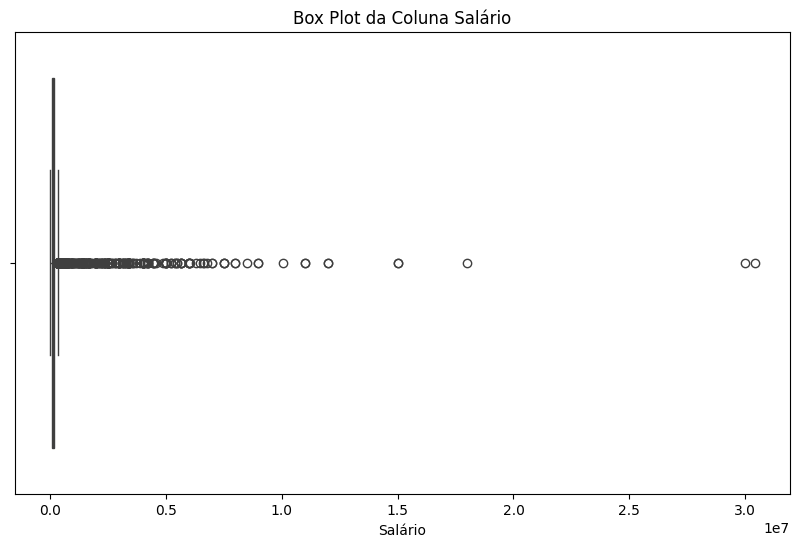

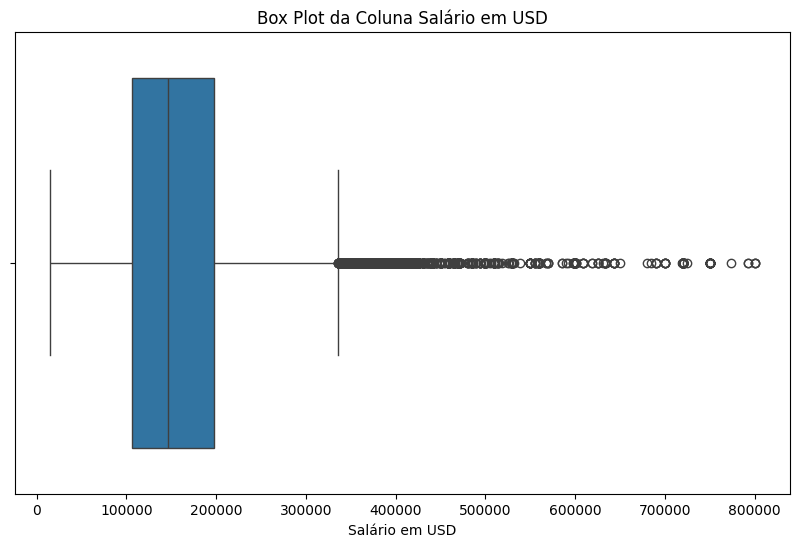

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar box plot para a coluna 'salario'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limpo['salario'])
plt.title('Box Plot da Coluna Salário')
plt.xlabel('Salário')
plt.show()

# Criar box plot para a coluna 'USD'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limpo['USD'])
plt.title('Box Plot da Coluna Salário em USD')
plt.xlabel('Salário em USD')
plt.show()

In [68]:
#Após realizado o boxplot verificamos o Q1, Q3 e IQR para verificar os maiores valores da coluna salário.

In [67]:
# Calcular Q1, Q3 e IQR para a coluna 'salario'
Q1_salario = df_limpo['salario'].quantile(0.25)
Q3_salario = df_limpo['salario'].quantile(0.75)
IQR_salario = Q3_salario - Q1_salario

# Definir o limite superior para outliers na coluna 'salario'
limite_superior_salario = Q3_salario + 1.5 * IQR_salario

# Exibir as linhas onde 'salario' é um outlier alto
print("Linhas com outliers altos na coluna 'salario':")
display(df_limpo[df_limpo['salario'] > limite_superior_salario])
print("-" * 30)

# Calcular Q1, Q3 e IQR para a coluna 'USD'
Q1_usd = df_limpo['USD'].quantile(0.25)
Q3_usd = df_limpo['USD'].quantile(0.75)
IQR_usd = Q3_usd - Q1_usd

# Definir o limite superior para outliers na coluna 'USD'
limite_superior_usd = Q3_usd + 1.5 * IQR_usd

# Exibir as linhas onde 'USD' é um outlier alto
print("Linhas com outliers altos na coluna 'USD':")
display(df_limpo[df_limpo['USD'] > limite_superior_usd])

Linhas com outliers altos na coluna 'salario':


,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,localizacao_da_empresa,tamanho_da_empresa
267,2025,Pleno,Tempo Integral,AI Researcher,350000,USD,350000,US,Remoto,US,M
311,2025,Pleno,Tempo Integral,Research Engineer,405000,USD,405000,US,Presencial,US,M
346,2025,Senior,Tempo Integral,Manager,364254,USD,364254,US,Remoto,US,M
348,2025,Senior,Tempo Integral,Machine Learning Engineer,342000,USD,342000,US,Remoto,US,M
374,2025,Pleno,Tempo Integral,Analytics Engineer,900000,PHP,15347,PH,Remoto,PH,M
...,...,...,...,...,...,...,...,...,...,...,...
133324,2021,Junior,Tempo Integral,AI Scientist,1335000,INR,18053,IN,Remoto,AS,S
133329,2021,Pleno,Tempo Integral,Lead Data Analyst,1450000,INR,19609,IN,Remoto,IN,Grande
133341,2021,Pleno,Tempo Integral,Applied Machine Learning Scientist,423000,USD,423000,US,Hibrido,US,Grande
133344,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande


------------------------------
Linhas com outliers altos na coluna 'USD':


,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,localizacao_da_empresa,tamanho_da_empresa
267,2025,Pleno,Tempo Integral,AI Researcher,350000,USD,350000,US,Remoto,US,M
311,2025,Pleno,Tempo Integral,Research Engineer,405000,USD,405000,US,Presencial,US,M
346,2025,Senior,Tempo Integral,Manager,364254,USD,364254,US,Remoto,US,M
348,2025,Senior,Tempo Integral,Machine Learning Engineer,342000,USD,342000,US,Remoto,US,M
435,2025,Pleno,Tempo Integral,Manager,425000,USD,425000,US,Presencial,US,M
...,...,...,...,...,...,...,...,...,...,...,...
133079,2022,Senior,Tempo Integral,Applied Data Scientist,380000,USD,380000,US,Remoto,US,Grande
133131,2020,Pleno,Tempo Integral,Research Scientist,450000,USD,450000,US,Presencial,US,M
133276,2021,Executivo,Contrato,Principal Data Scientist,416000,USD,416000,US,Remoto,US,S
133341,2021,Pleno,Tempo Integral,Applied Machine Learning Scientist,423000,USD,423000,US,Hibrido,US,Grande
